In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from astropy.table import Table
from omnitool.literature_values import *

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Read in Jie Yu
def read_yu18():
    sfile = '/home/oliver/PhD/Catalogues/RC_catalogues/Yu+18_table1.txt'
    cols = ['KICID','numax','err','dnu','err.1']
    yu18_1 = pd.read_csv(sfile, usecols=cols, sep='|')

    sfile = '/home/oliver/PhD/Catalogues/RC_catalogues/Yu+18_table2.txt'
#     cols = ['KICID','Teff','err','logg','err.1_y','Fe/H','err.2','EvoPhase']
    yu18_2 = pd.read_csv(sfile, sep='|')
    yu18 = pd.merge(yu18_1, yu18_2, on='KICID',how='left')
    yu18.rename(columns={'EvoPhase':'stage',
                        'err_x':'numax_err',
                        'err.1_x':'dnu_err',
                        'err_y':'Teff_err',
                         'Fe/H':'[Fe/H]',
                        'err.2':'[Fe/H]_err',
                        'logg':'yu_logg',
                        'err.1_y':'yu_logg_err',
                        'err.3_y':'M_err',
                        'err.4_y':'R_err'},inplace=True) #For consistency
    return yu18

In [3]:
ydf = read_yu18()
ydf.head(2)
print(list(ydf))

['KICID', 'numax', 'numax_err', 'dnu', 'dnu_err', 'Teff', 'Teff_err', 'yu_logg', 'yu_logg_err', '[Fe/H]', '[Fe/H]_err', 'M_noCorrection', 'err.3', 'R_noCorrection', 'err.4', 'M_RGB', 'err.5', 'R_RGB', 'err.6', 'M_Clump', 'err.7', 'R_Clump', 'err.8', 'stage', 'Unnamed: 20']


In [4]:
data = Table.read('../data/KepxDR2/kepler_dr2_1arcsec.fits', format='fits')
kdf = data.to_pandas()
kdf.rename(columns={'kepid':'KICID'},inplace=True)
kdf.head(2)

,designation,source_id,gaia_ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,...,mass_err2,prov_sec,nconfp,nkoi,ntce,jmag,hmag,kmag,planet?,kepler_gaia_ang_dist
0,Gaia DR2 2050233807328471424,2.050234e+18,2015.5,291.038681,0.035878,36.598031,0.047832,1.493916,0.048328,30.912294,...,-0.475,DSEP,0.0,0.0,0.0,10.126,9.667,9.559,none,0.381502
1,Gaia DR2 2050233601176543104,2.050234e+18,2015.5,291.043057,0.019919,36.593767,0.027553,2.678194,0.027151,98.642212,...,-0.233,DSEP,0.0,0.0,1.0,11.656,11.193,11.094,none,0.158389


In [5]:
df = kdf

In [6]:
df = pd.merge(ydf, kdf, on='KICID',how='left')
print(list(df))

['KICID', 'numax', 'numax_err', 'dnu', 'dnu_err', 'Teff', 'Teff_err', 'yu_logg', 'yu_logg_err', '[Fe/H]', '[Fe/H]_err', 'M_noCorrection', 'err.3', 'R_noCorrection', 'err.4', 'M_RGB', 'err.5', 'R_RGB', 'err.6', 'M_Clump', 'err.7', 'R_Clump', 'err.8', 'stage', 'Unnamed: 20', 'designation', 'source_id', 'gaia_ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'parallax_over_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'astrometric_chi2_al', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_primary_flag', 'duplicated_source', 'phot_g_mean_flux', 'phot_g_mean_flux_error', 'phot_g_mean_mag', 'phot_bp_mean_flux', 'phot_bp_mean_flux_error', 'phot_bp_mean_mag', 'phot_rp_mean_flux', 'phot_rp_mean_flux_error', 'phot_rp_mean_mag', 'bp_rp', 'bp_g', 'g_rp

In [6]:
sns.jointplot(df.Teff, df.teff)
plt.show()
sns.jointplot(df['[Fe/H]'], df.feh)
plt.show()
sns.jointplot(df.yu_logg,df.logg)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Teff'

In [9]:
#Now lets read in the KICID and relevant information from APOKASC
sfile = '/home/oliver/PhD/Catalogues/APOKASC/APOKASC_cat_v3.6.5.txt'
cols= ['KEPLER_ID',\
      'J_MAG_2M', 'J_MAG_ERR', 'H_MAG_2M', 'H_MAG_ERR',\
       'K_MAG_2M', 'K_MAG_ERR']

apokasc = pd.read_csv(sfile, usecols=cols, skiprows=644,sep='\s+')
apokasc.rename(columns={'KEPLER_ID':'KICID'},inplace=True)

apokasc.head(2)

,KICID,J_MAG_2M,J_MAG_ERR,H_MAG_2M,H_MAG_ERR,K_MAG_2M,K_MAG_ERR
0,10000207,10.811,0.021,10.261,0.017,10.172,0.012
1,10000547,10.712,0.021,10.247,0.019,10.161,0.014


In [16]:
fdf = pd.merge(df, apokasc, on='KICID',how='left')
fdf.K_MAG_2M
print(len(np.isfinite(apokasc.K_MAG_2M)))

11876


In [79]:
df.to_csv('../data/KepxDR2/xyu18.csv')

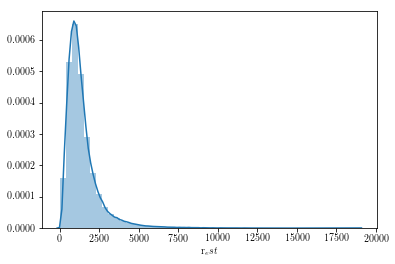

195830
195830


In [7]:
sel = np.isfinite(df.r_est)
sns.distplot(df.r_est[sel])
plt.show()
print(len(df.r_est[sel]))
print(len(df.r_est))

In [33]:
sel = np.isfinite(df.parallax)
print(len(df.parallax[sel]))

16078


In [8]:
len(df)

195830